In [1]:
'''
Jo Slayton 2020

Will calculate the direction of the sensor using a randomly generated x,y pair
A concept test for the arduino implementation
'''

import numpy as np

# idk what i'm doing
degrees = [360,355.5,351.0,346.5,342.0,337.5,333.0,328.5,324.0,319.5,315.0,310.5,306.0,301.5,
                   297.0,292.5,288.0,283.5,279.0,274.5,270.0,265.5,261.0,256.5,252.0,247.5,243.0,
                   238.5,234.0,229.5,225.0,220.5,216.0,211.5,207.0,202.5,198.0,193.5,189.0,184.5,
                   180.0,175.5,171.0,166.5,162.0,157.5,153.0,148.5,144.0,139.5,135.0,130.5,126.0,
                   121.5,117.0,112.5,108.0,103.5,99.0,94.5,90.0,85.5,81.0,76.5,72.0,67.5,63.0,58.5,
                   54.0,49.5,45.0,40.5,36.0,31.5,27.0,22.5,18.0,13.5,9.0,4.5]
                   
xavgs = [0.198,0.162,0.134,0.067,0.031,0.005,-0.048,-0.046,-0.063,-0.148,-0.229,-0.231,-0.266,
                 -0.305,-0.389,-0.54,-0.576,-0.638,-0.659,-0.738,-0.731,-0.848,-0.891,-0.889,-0.918,
                 -0.964,-0.922,-1.024,-1.005,-0.981,-0.986,-1.005,-0.961,-0.981,-0.971,-0.945,-0.91,
                 -0.912,-0.849,-0.818,-0.752,-0.709,-0.663,-0.672,-0.552,-0.542,-0.522,-0.393,-0.362,
                 -0.362,-0.231,-0.179,-0.108,-0.096,-0.003,0.023,0.034,0.127,0.107,0.146,0.163,0.232,
                 0.256,0.335,0.312,0.369,0.392,0.372,0.38,0.447,0.48,0.435,0.454,0.396,0.379,0.37,
                 0.354,0.306,0.244,0.261]
                 
yavgs = [-0.342,-0.388,-0.425,-0.458,-0.499,-0.501,-0.536,-0.513,-0.607,-0.57,-0.575,-0.572,
                 -0.551,-0.585,-0.57,-0.47,-0.479,-0.454,-0.434,-0.384,-0.419,-0.359,-0.201,-0.18,
                 -0.219,-0.104,-0.057,-0.06,-0.023,-0.003,0.012,0.093,0.151,0.177,0.3,0.305,0.386,
                 0.431,0.501,0.501,0.52,0.627,0.668,0.684,0.713,0.774,0.768,0.803,0.795,0.775,0.811,
                 0.859,0.824,0.79,0.775,0.766,0.754,0.67,0.683,0.711,0.622,0.576,0.55,0.516,0.412,
                 0.386,0.268,0.234,0.191,0.139,0.024,0.009,-0.035,-0.048,-0.106,-0.141,-0.257,-0.276,
                 -0.302,-0.367]

degrees_colors = np.abs(np.array(degrees) - 180)

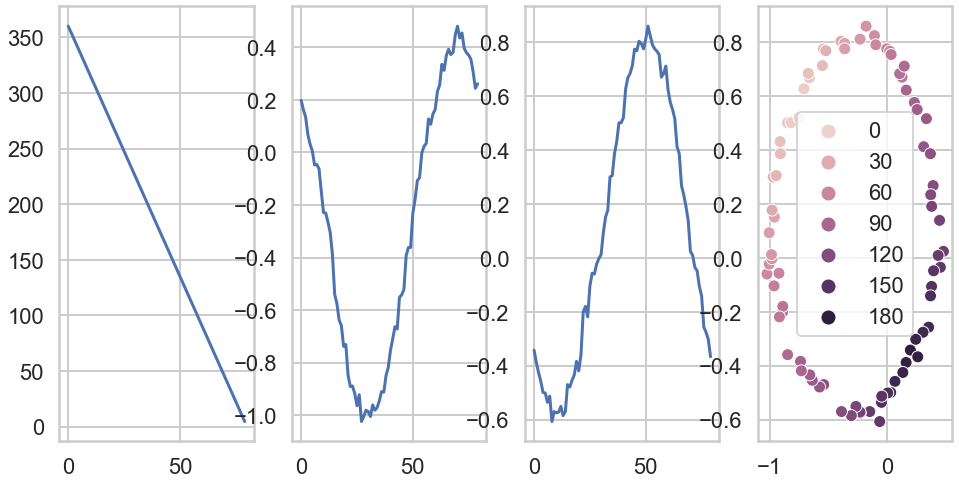

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context="poster", style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))

sns.lineplot(ax=axes[0], x=range(len(degrees)), y=degrees);
sns.lineplot(ax=axes[1], x=range(len(xavgs)), y=xavgs);
sns.lineplot(ax=axes[2], x=range(len(yavgs)), y=yavgs);
sns.scatterplot(ax=axes[3], x=xavgs, y=yavgs, hue=degrees_colors);

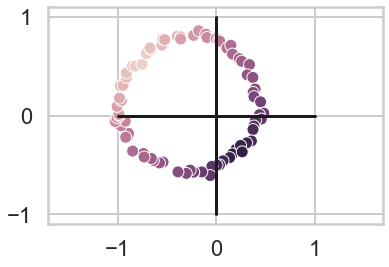

In [5]:
ax = sns.scatterplot(x=xavgs, y=yavgs, hue=degrees_colors, legend=False);
ax.axis('equal')
ax.plot([0, 0], [-1, 1], 'k')
ax.plot([-1, 1], [0, 0], 'k')

(-1.0992, 0.5552, -0.6803, 0.9323)

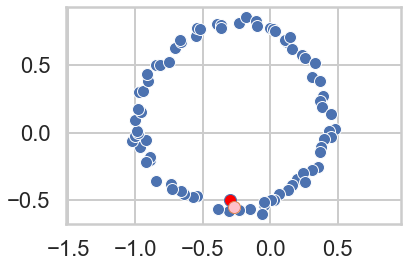

In [79]:
# Put the x and y sensor readings into a 80x2 matrix
sensor_readings = np.array([xavgs, yavgs]).T

# Put the measured angle into an array
angle = np.array(degrees)

def get_closest(x: float, y: float) -> float:
    """Get the angle of the closest point."""
    # Distance between given readings and all stored data
    dists = np.linalg.norm([x, y] - sensor_readings, axis=1)
    # Index of minimum distance
    closest_index = np.argmin(dists)
    return angle[closest_index], sensor_readings[closest_index, :]

# For example
new_x = -0.3
new_y = -0.5

predicted_angle, closest_point = get_closest(new_x, new_y)

ax = sns.scatterplot(x=sensor_readings[:,0], y=sensor_readings[:,1])
ax.plot(new_x, new_y, 'o', markerfacecolor='red')
ax.plot(closest_point[0], closest_point[1], 'o', markerfacecolor='pink')
ax.axis('equal');